In [1]:
import numpy as np
from netCDF4 import Dataset
import datetime
import glob
import os
import matplotlib.pyplot as plt
import cartopy
from matplotlib import gridspec
import cartopy.crs as ccrs
from scipy.stats import linregress
import warnings
warnings.filterwarnings("ignore")

In [2]:
ctrl = 'rosie_UCL_CTL_NOSIT_ASSIM_r243541_dcarneir/'
base = 'rosie_UCL_BASELINE_SIT_ASSIM_CS2_AWI_SNFOAM_ALPHA1_r243541_dcarneir/'
nine = 'rosie_UCL_SIT_ASSIM_CS2_AWI_SNFOAM_ALPHA09_r243541_dcarneir/'
six = 'rosie_UCL_SIT_ASSIM_CS2_AWI_SNFOAM_ALPHA06_r243541_dcarneir/'
larm = 'rosie_UCL_SIT_ASSIM_CS2_BRISTOL_SNFOAM_ALPHA1_r243541_dcarneir/'
cpom = 'rosie_UCL_SIT_ASSIM_CS2_CPOM_SNFOAM_ALPHA1_r243541_dcarneir/'
smlg = 'rosie_UCL_SIT_ASSIM_CS2_AWI_SNLG_ALPHA1_r243541_dcarneir/'
awi = 'rosie_UCL_SIT_ASSIM_CS2_AWI_SNAWI_ALPHA1_r243541_dcarneir/'
unc = 'rosie_UCL_SIT_ASSIM_CS2_AWI_SNFOAM_ALPHA1_NEW_OBERR_r243541_dcarneir/'

titles = ['CTRL','BASE','\u03B1_0.9', '\u03B1_0.6','FB_LARM','FB_CPOM','SN_SMLG','SN_AWI','UNC']
folders = [ctrl, base, nine, six, larm, cpom, smlg, awi,unc]

In [3]:
datapath = '/Users/carmennab/Dropbox/met_office/data/validation/IceBird/matched/'

days = np.arange(0,212)
dates = [datetime.date(2016,10,1)+datetime.timedelta(days=np.int(days)) for days in days]

all_lons = {} ; all_lats = {} ; all_diffs = {} ; all_rs = {} ; all_rmses = {}; all_obs = {} ; all_foams = {}
for folder,title in zip(folders,titles):
    diffs = [] ; lons = [] ; lats = [] ; obs = [] ; foams = []
    for day in days:
        date = dates[day].strftime('%Y%m%d')
        filepath = datapath + folder + date + 'T0000Z_sitfb_oo_fdbk.nc'
        if os.path.exists(filepath) == True:
            file = Dataset(filepath)
            foam = np.array(file['SIT_Hx'][:,0])
            ob = np.array(file['SIT_OBS'][:,0])
            lon = np.array(file['LONGITUDE'])
            lat = np.array(file['LATITUDE'])
            
            obs.extend(ob) ; foams.extend(foam) ; lons.extend(lon) ; lats.extend(lat)

    obs = np.array(obs) ; foams = np.array(foams)
    all_obs[title] = obs ; all_foams[title] = foams

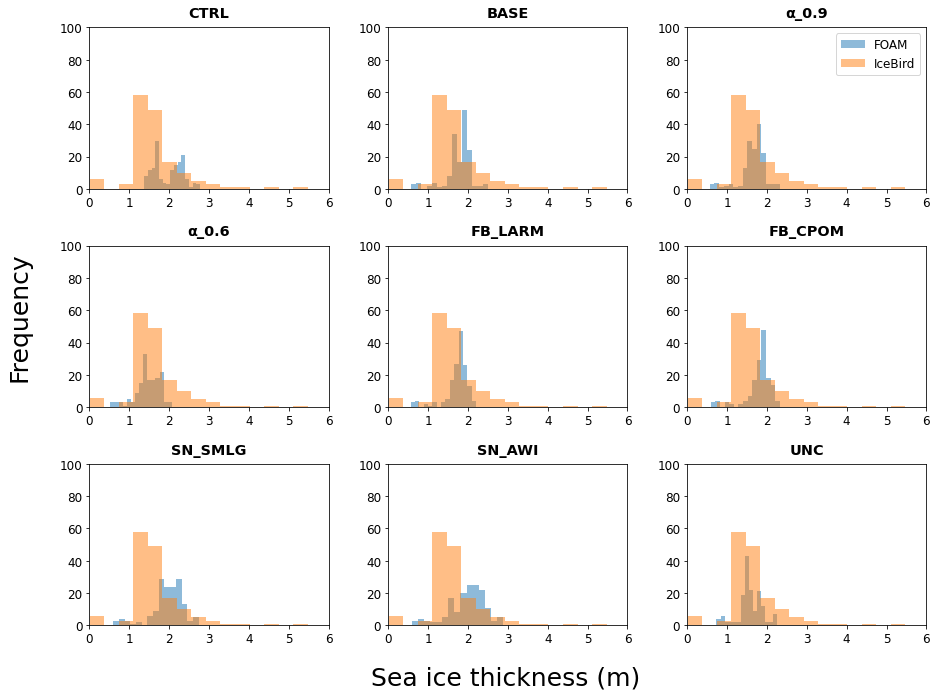

In [5]:
fig = plt.figure(figsize=(15,11))
spec = gridspec.GridSpec(ncols=3, nrows=3, hspace=0.35, wspace=0.25)
plt.rc('font', size=12)

for count, title in enumerate(titles):
    foams = all_foams[title]
    obs = all_obs[title]
    ax = fig.add_subplot(spec[count])
    
    mask = np.where((~np.isnan(obs)) & (~np.isnan(foams)))
    ax.hist(foams[mask], bins=15,alpha=0.5, label='FOAM')
    ax.hist(obs[mask], bins=15,alpha=0.5, label='IceBird')
       
    ax.set_ylim([0,100])
    ax.set_xlim([0,6])
    ax.set_title(title,fontweight='bold',pad=10)
    
    if count == 2:
        ax.legend(loc='upper right',ncol=1)

fig.text(0.06, 0.44, 'Frequency', ha='center',fontsize=25,rotation='vertical')
fig.text(0.51, 0.05, 'Sea ice thickness (m)', ha='center',fontsize=25,rotation='horizontal')
    
plt.savefig('/Users/carmennab/Dropbox/Apps/Overleaf/FOAM sensitivity/supp_figs/icebird_hist.png',dpi=400, bbox_inches="tight")